In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from skopt import BayesSearchCV
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV



In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [5]:
# Random Forest,
# Ada Boost,
# Gradient Boosting 
# Logistic Regression 
# Multi-layer Perceptron (MLP) Classifier, 
# Decision Tree Classifier 
# Multinomial Naïve Bayes (MultinomialNB)
# Gaussian Naïve Bayes (GaussianNB) 
# Support Vector Classifier (SVC) on, 
# K-Neighbors 
# Extreme Gradient Boosting Classifier (XGBClassifier)

In [6]:
lr_model = LogisticRegression()
svm_model = SVC(probability=True)
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()
guasa_model = GaussianNB()
ada_model = AdaBoostClassifier()
dt_model = DecisionTreeClassifier()
mlp_model = MLPClassifier() 
mnb_model = MultinomialNB()
gb_model = GradientBoostingClassifier()





# Step 2: Set up parameter grids for hyperparameter tuning
param_grid_lr = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
param_grid_xgb = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators': [50, 100, 200, 300]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], "metric": ['euclidean', 'manhattan', 'minkowski']}
param_rf_model = { 'max_features' : ['sqrt', 'log2'] , "n_estimators": [10, 100, 1000]}
param_guasa_model = { 'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6, 1e-5], "priors": [None], }
param_ada_model = { 'n_estimators' : [10, 100, 1000], "learning_rate": [0.001, 0.01, 0.1, 1, 10], "algorithm": ['SAMME', 'SAMME.R']}
param_dt_model = { 'max_depth' : [3, 5, 7, 9, 11, 13, 15], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
param_mlp_model = { 'hidden_layer_sizes' : [(50,50,50), (50,100,50), (100,)], "activation": ['tanh', 'relu'], "solver": ['sgd', 'adam'], "alpha": [0.0001, 0.05], "learning_rate": ['constant','adaptive']}
param_mnb_model = { 'alpha' : [0.001, 0.01, 0.1, 1, 10, 100], "fit_prior": [True, False]}   
param_gb_model = { 'n_estimators' : [10, 100, 1000], "learning_rate": [0.001, 0.01, 0.1, 1, 10], "subsample": [0.1, 0.5, 1.0], "max_depth": [3, 7, 9]}


In [7]:
df = pd.read_csv('../data/15_best_features.csv')
df = df.drop('Unnamed: 0', axis=1)

In [8]:
y = pd.read_csv('../data/jak3_activity.csv')
y

,activity
0,1
1,1
2,1
3,0
4,1
...,...
3266,1
3267,1
3268,1
3269,1


In [10]:
df = pd.read_csv('../data/jak3_descriptors.csv')
df = df[['MinEStateIndex', 'BCUT2D_MRHI', 'PEOE_VSA12', 'PEOE_VSA6', 'SMR_VSA2',
       'SMR_VSA6', 'SlogP_VSA8', 'VSA_EState5', 'NumAliphaticCarbocycles',
       'NumAromaticCarbocycles', 'NumAromaticRings', 'fr_Ar_N', 'fr_Ar_NH',
       'fr_aniline', 'fr_imidazole']]
df

,MinEStateIndex,BCUT2D_MRHI,PEOE_VSA12,PEOE_VSA6,SMR_VSA2,SMR_VSA6,SlogP_VSA8,VSA_EState5,NumAliphaticCarbocycles,NumAromaticCarbocycles,NumAromaticRings,fr_Ar_N,fr_Ar_NH,fr_aniline,fr_imidazole
0,-4.483900,6.048968,5.948339,18.199101,0.0,11.050456,22.029828,-0.317443,0,3,4,2,0,2,0
1,-0.439546,5.770843,5.948339,24.265468,0.0,6.606882,28.145619,0.144119,0,2,5,6,1,0,2
2,-0.245588,6.317418,5.948339,35.866408,0.0,6.606882,28.145619,1.063775,0,2,5,6,1,0,2
3,0.533437,5.768679,5.948339,0.000000,0.0,12.426586,16.774080,1.339691,0,1,4,5,1,2,0
4,-3.377002,7.904663,5.948339,24.265468,0.0,37.026531,5.647177,1.083059,0,2,4,3,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,-1.178358,6.312585,17.735507,18.179876,0.0,62.979780,0.000000,0.041117,0,1,2,2,0,4,0
3267,-3.073039,6.312588,17.735507,18.179876,0.0,62.979780,0.000000,-3.263469,0,1,2,2,0,4,0
3268,-0.292129,5.984079,11.855519,18.711670,0.0,48.760185,11.033401,0.116384,0,2,4,3,0,4,0
3269,0.215911,5.894574,5.948339,12.132734,0.0,12.843465,22.029828,1.088398,0,2,3,2,0,1,0


In [11]:
df.shape, y.shape

((3271, 15), (3271, 1))

In [12]:
df

,MinEStateIndex,BCUT2D_MRHI,PEOE_VSA12,PEOE_VSA6,SMR_VSA2,SMR_VSA6,SlogP_VSA8,VSA_EState5,NumAliphaticCarbocycles,NumAromaticCarbocycles,NumAromaticRings,fr_Ar_N,fr_Ar_NH,fr_aniline,fr_imidazole
0,-4.483900,6.048968,5.948339,18.199101,0.0,11.050456,22.029828,-0.317443,0,3,4,2,0,2,0
1,-0.439546,5.770843,5.948339,24.265468,0.0,6.606882,28.145619,0.144119,0,2,5,6,1,0,2
2,-0.245588,6.317418,5.948339,35.866408,0.0,6.606882,28.145619,1.063775,0,2,5,6,1,0,2
3,0.533437,5.768679,5.948339,0.000000,0.0,12.426586,16.774080,1.339691,0,1,4,5,1,2,0
4,-3.377002,7.904663,5.948339,24.265468,0.0,37.026531,5.647177,1.083059,0,2,4,3,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,-1.178358,6.312585,17.735507,18.179876,0.0,62.979780,0.000000,0.041117,0,1,2,2,0,4,0
3267,-3.073039,6.312588,17.735507,18.179876,0.0,62.979780,0.000000,-3.263469,0,1,2,2,0,4,0
3268,-0.292129,5.984079,11.855519,18.711670,0.0,48.760185,11.033401,0.116384,0,2,4,3,0,4,0
3269,0.215911,5.894574,5.948339,12.132734,0.0,12.843465,22.029828,1.088398,0,2,3,2,0,1,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

PERFORM A GRID SEARCH FOR EACH MODEL 

In [14]:
grid_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [15]:
best_lr_model = grid_lr.best_estimator_
best_lr_model

LogisticRegression(C=1, solver='newton-cg')

In [19]:
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning

KeyboardInterrupt: 

In [ ]:
best_svm_model = grid_svm.best_estimator_
best_svm_model

SVC(C=100, gamma=1, probability=True)

In [17]:
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [18]:
best_xgb_model = grid_xgb.best_estimator_
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWa

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [21]:
best_knn_model = grid_knn.best_estimator_
best_knn_model

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [22]:
grid_rf = GridSearchCV(rf_model, param_rf_model, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A co

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [23]:
best_rf_model = grid_rf.best_estimator_
best_rf_model

RandomForestClassifier(max_features='log2', n_estimators=1000)

In [24]:
grid_guasa = GridSearchCV(guasa_model, param_guasa_model, cv=5, scoring='accuracy', n_jobs=-1)
grid_guasa.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [25]:
best_guasa_model = grid_guasa.best_estimator_
best_guasa_model

GaussianNB(var_smoothing=1e-05)

In [26]:
grid_ada = GridSearchCV(ada_model, param_ada_model, cv=5, scoring='accuracy', n_jobs=-1)
grid_ada.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [27]:
best_ada_model = grid_ada.best_estimator_
best_ada_model

AdaBoostClassifier(learning_rate=1, n_estimators=1000)

In [28]:
grid_dt = GridSearchCV(dt_model, param_dt_model, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [29]:
best_dt_model = grid_dt.best_estimator_
best_dt_model

DecisionTreeClassifier(max_depth=11)

In [30]:
grid_mlp = GridSearchCV(mlp_model, param_mlp_model, cv=5, scoring='accuracy', n_jobs=-1)
grid_mlp.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-p

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [31]:
best_mlp_model = grid_mlp.best_estimator_
best_mlp_model

MLPClassifier()

In [32]:
grid_mnb = GridSearchCV(mnb_model, param_mnb_model, cv=5, scoring='accuracy', n_jobs=-1)
grid_mnb.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/naive_bayes.py", line 759, in fit
    self._count(X, Y)
  File "/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/naive_bayes.py", line 881, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1572, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)


In [ ]:
best_mnb_model = grid_mnb.best_estimator_
best_mnb_model

MultinomialNB(alpha=0.001)

In [33]:
grid_gb = GridSearchCV(gb_model, param_gb_model, cv=5, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConve

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [10, 100, 1000],
                         'subsample': [0.1, 0.5, 1.0]},
             scoring='accuracy')

In [34]:
best_gb_model = grid_gb.best_estimator_
best_gb_model

GradientBoostingClassifier(max_depth=9, n_estimators=1000)

In [36]:
from sklearn.metrics import accuracy_score

# Create a dictionary to store the accuracy scores
accuracy_scores = {}

# Calculate the accuracy score for each model
accuracy_scores['Logistic Regression'] = accuracy_score(y_test, best_lr_model.predict(X_test))
#accuracy_scores['SVM'] = accuracy_score(y_test, best_svm_model.predict(X_test))
accuracy_scores['XGBoost'] = accuracy_score(y_test, best_xgb_model.predict(X_test))
accuracy_scores['KNN'] = accuracy_score(y_test, best_knn_model.predict(X_test))
accuracy_scores['Random Forest'] = accuracy_score(y_test, best_rf_model.predict(X_test))
accuracy_scores['Gaussian Naive Bayes'] = accuracy_score(y_test, best_guasa_model.predict(X_test))
accuracy_scores['AdaBoost'] = accuracy_score(y_test, best_ada_model.predict(X_test))
accuracy_scores['Decision Tree'] = accuracy_score(y_test, best_dt_model.predict(X_test))
accuracy_scores['MLP'] = accuracy_score(y_test, best_mlp_model.predict(X_test))
#accuracy_scores['Multinomial Naive Bayes'] = accuracy_score(y_test, best_mnb_model.predict(X_test))
accuracy_scores['Gradient Boosting'] = accuracy_score(y_test, best_gb_model.predict(X_test))

# Print the accuracy scores
accuracy_scores


{'Logistic Regression': 0.6748091603053435,
 'XGBoost': 0.766412213740458,
 'KNN': 0.7267175572519083,
 'Random Forest': 0.8,
 'Gaussian Naive Bayes': 0.6534351145038167,
 'AdaBoost': 0.7267175572519083,
 'Decision Tree': 0.7801526717557252,
 'MLP': 0.7129770992366412,
 'Gradient Boosting': 0.7862595419847328}

In [38]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Create a dictionary to store the scores
scores = {}

# Calculate the scores for each model
scores['Logistic Regression'] = classification_report(y_test, best_lr_model.predict(X_test), output_dict=True)['weighted avg']
#scores['SVM'] = classification_report(y_test, best_svm_model.predict(X_test), output_dict=True)['weighted avg']
scores['XGBoost'] = classification_report(y_test, best_xgb_model.predict(X_test), output_dict=True)['weighted avg']
scores['KNN'] = classification_report(y_test, best_knn_model.predict(X_test), output_dict=True)['weighted avg']
scores['Random Forest'] = classification_report(y_test, best_rf_model.predict(X_test), output_dict=True)['weighted avg']
scores['Gaussian Naive Bayes'] = classification_report(y_test, best_guasa_model.predict(X_test), output_dict=True)['weighted avg']
scores['AdaBoost'] = classification_report(y_test, best_ada_model.predict(X_test), output_dict=True)['weighted avg']
scores['Decision Tree'] = classification_report(y_test, best_dt_model.predict(X_test), output_dict=True)['weighted avg']
scores['MLP'] = classification_report(y_test, best_mlp_model.predict(X_test), output_dict=True)['weighted avg']
#scores['Multinomial Naive Bayes'] = classification_report(y_test, best_mnb_model.predict(X_test), output_dict=True)['weighted avg']
scores['Gradient Boosting'] = classification_report(y_test, best_gb_model.predict(X_test), output_dict=True)['weighted avg']

# Convert the scores dictionary to a pandas DataFrame
scores_df = pd.DataFrame(scores).T[['precision', 'recall', 'f1-score', 'support']]

# Add the ROC scores to the DataFrame
scores_df['ROC Score'] = [roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1]),
                          #roc_auc_score(y_test, best_svm_model.predict_proba(X_test)[:, 1]),
                          roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1]),
                          roc_auc_score(y_test, best_knn_model.predict_proba(X_test)[:, 1]),
                          roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]),
                          roc_auc_score(y_test, best_guasa_model.predict_proba(X_test)[:, 1]),
                          roc_auc_score(y_test, best_ada_model.predict_proba(X_test)[:, 1]),
                          roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1]),
                          roc_auc_score(y_test, best_mlp_model.predict_proba(X_test)[:, 1]),
                          #roc_auc_score(y_test, best_mnb_model.predict_proba(X_test)[:, 1]),
                          roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])]

# Print the scores DataFrame
scores_df['accuracy score'] = accuracy_scores.values()

scores_df



,precision,recall,f1-score,support,ROC Score,accuracy score
Logistic Regression,0.662673,0.674809,0.630972,655.0,0.690169,0.674809
XGBoost,0.762312,0.766412,0.762760,655.0,0.836674,0.766412
KNN,0.721154,0.726718,0.722444,655.0,0.740796,0.726718
Random Forest,0.797455,0.800000,0.795260,655.0,0.857203,0.800000
Gaussian Naive Bayes,0.631113,0.653435,0.624633,655.0,0.628574,0.653435
AdaBoost,0.719053,0.726718,0.716870,655.0,0.764016,0.726718
Decision Tree,0.777624,0.780153,0.778398,655.0,0.789216,0.780153
MLP,0.708725,0.712977,0.687313,655.0,0.757063,0.712977
Gradient Boosting,0.782810,0.786260,0.782506,655.0,0.839454,0.786260


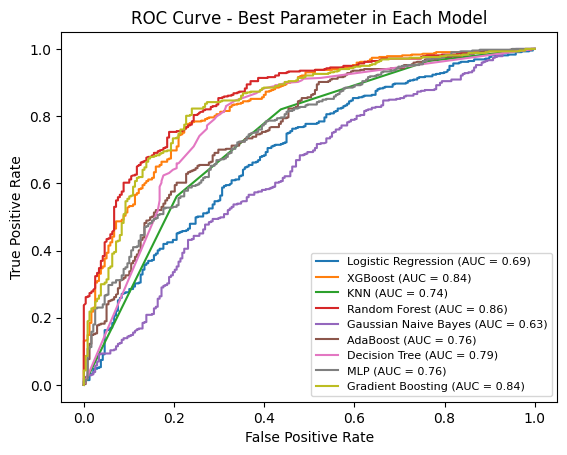

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
from numpy import size
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate and true positive rate for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
#fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
fpr_guasa, tpr_guasa, _ = roc_curve(y_test, best_guasa_model.predict_proba(X_test)[:, 1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, best_ada_model.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, best_mlp_model.predict_proba(X_test)[:, 1])
#fpr_mnb, tpr_mnb, _ = roc_curve(y_test, best_mnb_model.predict_proba(X_test)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, best_gb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC score for each model
auc_lr = auc(fpr_lr, tpr_lr)
#auc_svm = auc(fpr_svm, tpr_svm)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_knn = auc(fpr_knn, tpr_knn)
auc_rf = auc(fpr_rf, tpr_rf)
auc_guasa = auc(fpr_guasa, tpr_guasa)
auc_ada = auc(fpr_ada, tpr_ada)
auc_dt = auc(fpr_dt, tpr_dt)
auc_mlp = auc(fpr_mlp, tpr_mlp)
#auc_mnb = auc(fpr_mnb, tpr_mnb)
auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curve for each model
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
#plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_guasa, tpr_guasa, label=f'Gaussian Naive Bayes (AUC = {auc_guasa:.2f})')
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {auc_ada:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')
#plt.plot(fpr_mnb, tpr_mnb, label=f'Multinomial Naive Bayes (AUC = {auc_mnb:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')

# Set the labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Parameter in Each Model')

# Add a legend to the plot
plt.legend(loc='lower right', prop={'size': 8})

# Show the plot
plt.show()
plt.savefig('../result_images/details_models.tiff')


# Create a Voting Classifier with tunable hyperparameters

In [46]:


from sklearn.ensemble import VotingClassifier
voting_classifier1 = VotingClassifier(estimators=[
    ('lr', best_lr_model),
    #('svm', best_svm_model),
    ('xgb', best_xgb_model),
    ('knn', best_knn_model), 
    ('rf', best_rf_model),
    ('guasa', best_guasa_model),
    ('ada', best_ada_model),
    ('dt', best_dt_model),
    ('mlp', best_mlp_model),
    #('mnb', best_mnb_model),
    ('gb', best_gb_model)
])
# Step 6: Set up parameter grid for the Voting Classifier
param_grid_voting1 = {'voting': ['soft', 'hard'], 'weights':[[1,1,1,1,1,1,1,1,1], [2,1,1,1,1,1,1,1,1], [1,2,1,1,1,1,1,1,1], [1,1,2,1,1,1,1,1,1], [1,1,1,2,1,1,1,1,1], [1,1,1,1,2,1,1,1,1], [1,1,1,1,1,2,1,1,1], [1,1,1,1,1,1,2,1,1], [1,1,1,1,1,1,1,2,1], [1,1,1,1,1,1,1,1,2]]}



In [47]:

grid_voting1 = GridSearchCV(voting_classifier1, param_grid_voting1, cv=10, scoring='accuracy', n_jobs=-1)

grid_voting1.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing

GridSearchCV(cv=10,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=1,
                                                                        solver='newton-cg')),
                                                    ('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None...
                                                    ('mlp', MLPClassifier()),
                                                    ('gb',
                                                     GradientBoostingClassifier(max_depth=9,
                                                                                n_estimators=1000))]),
             n_jobs=-1,
             param_grid={'voting': ['soft', 'hard'],
                         'weights': [[1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [2, 1, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 2, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 2, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 2, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 2, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 2, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 2, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 2, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 1, 2]]},
             scoring='accuracy')

In [48]:
# Step 9: Get the best Voting Classifier model
best_voting_classifier1 = grid_voting1.best_estimator_

# Step 10: Evaluate the best Voting Classifier on the test set
accuracy2 = best_voting_classifier1.score(X_test, y_test)

print(f'Best Voting Classifier Accuracy: {accuracy2}')
print('Best Voting Classifier Parameters:', grid_voting1.best_params_)

Best Voting Classifier Accuracy: 0.7862595419847328
Best Voting Classifier Parameters: {'voting': 'hard', 'weights': [1, 2, 1, 1, 1, 1, 1, 1, 1]}


In [49]:
y_pred = best_voting_classifier1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[145  93]
 [ 47 370]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.67       238
           1       0.80      0.89      0.84       417

    accuracy                           0.79       655
   macro avg       0.78      0.75      0.76       655
weighted avg       0.78      0.79      0.78       655



/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing

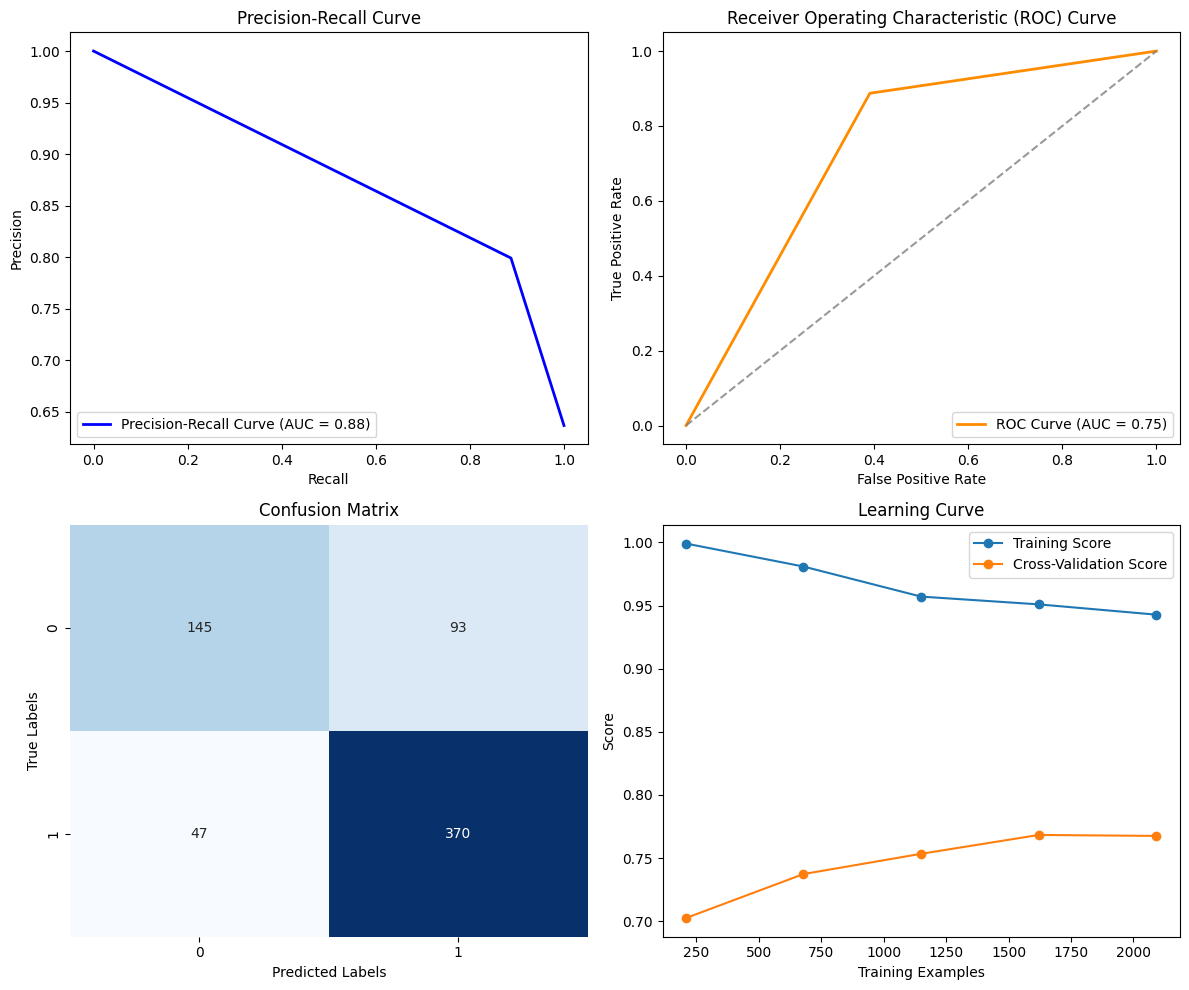

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier




# Make predictions on the test set
y_pred = best_voting_classifier1.predict(X_test)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# No changes to the rest of the code, just use y_pred instead of y_score

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
axes[0, 0].plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve')
axes[0, 0].legend(loc='lower left')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.8)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0, 1].legend(loc='lower right')

# Plot Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted Labels')
axes[1, 0].set_ylabel('True Labels')
axes[1, 0].set_title('Confusion Matrix')

# Plot Learning Curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    voting_classifier1, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5), return_times=True
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

axes[1, 1].plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
axes[1, 1].plot(train_sizes, test_scores_mean, 'o-', label='Cross-Validation Score')
axes[1, 1].set_xlabel('Training Examples')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()


In [53]:

voting_classifier2 = VotingClassifier(estimators=[


    ('dt', best_dt_model),
    ('xgb', best_xgb_model),
    ('rf', best_rf_model),
    ('gb', best_gb_model)
], voting='soft')

param_grid_voting2 = {'voting': ['soft', 'hard'], 'weights': [[1,1,1,1], [2,1,1,1], [1,2,1,1], [1,1,2,1], [1,1,1,2]]}

In [54]:

grid_voting2 = GridSearchCV(voting_classifier2, param_grid_voting2, cv=10, scoring='accuracy', n_jobs=-1)

grid_voting2.fit(X_train, y_train)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing

GridSearchCV(cv=10,
             estimator=VotingClassifier(estimators=[('dt',
                                                     DecisionTreeClassifier(max_depth=11)),
                                                    ('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   grow_...
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)),
                                                    ('rf',
                                                     RandomForestClassifier(max_features='log2',
                                                                            n_estimators=1000)),
                                                    ('gb',
                                                     GradientBoostingClassifier(max_depth=9,
                                                                                n_estimators=1000))],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'voting': ['soft', 'hard'],
                         'weights': [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1],
                                     [1, 1, 2, 1], [1, 1, 1, 2]]},
             scoring='accuracy')

In [56]:

# Step 9: Get the best Voting Classifier model
best_voting_classifier2 = grid_voting2.best_estimator_

# Step 10: Evaluate the best Voting Classifier on the test set
accuracy2 = best_voting_classifier2.score(X_test, y_test)

print(f'Best Voting Classifier Accuracy: {accuracy2}')
print('Best Voting Classifier Parameters:', grid_voting2.best_params_)

Best Voting Classifier Accuracy: 0.8015267175572519
Best Voting Classifier Parameters: {'voting': 'soft', 'weights': [1, 2, 1, 1]}


In [57]:
y_pred = best_voting_classifier2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[153  85]
 [ 45 372]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       238
           1       0.81      0.89      0.85       417

    accuracy                           0.80       655
   macro avg       0.79      0.77      0.78       655
weighted avg       0.80      0.80      0.80       655



# Perform GridSearchCV for the Voting Classifier

In [58]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

cohen_kappa_score(y_test, y_pred), matthews_corrcoef(y_test, y_pred)

(0.5549620554847072, 0.5602394725032854)

/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sefunmibodun/anaconda3/envs/dami/lib/python3.11/site-packages/sklearn/preprocessing

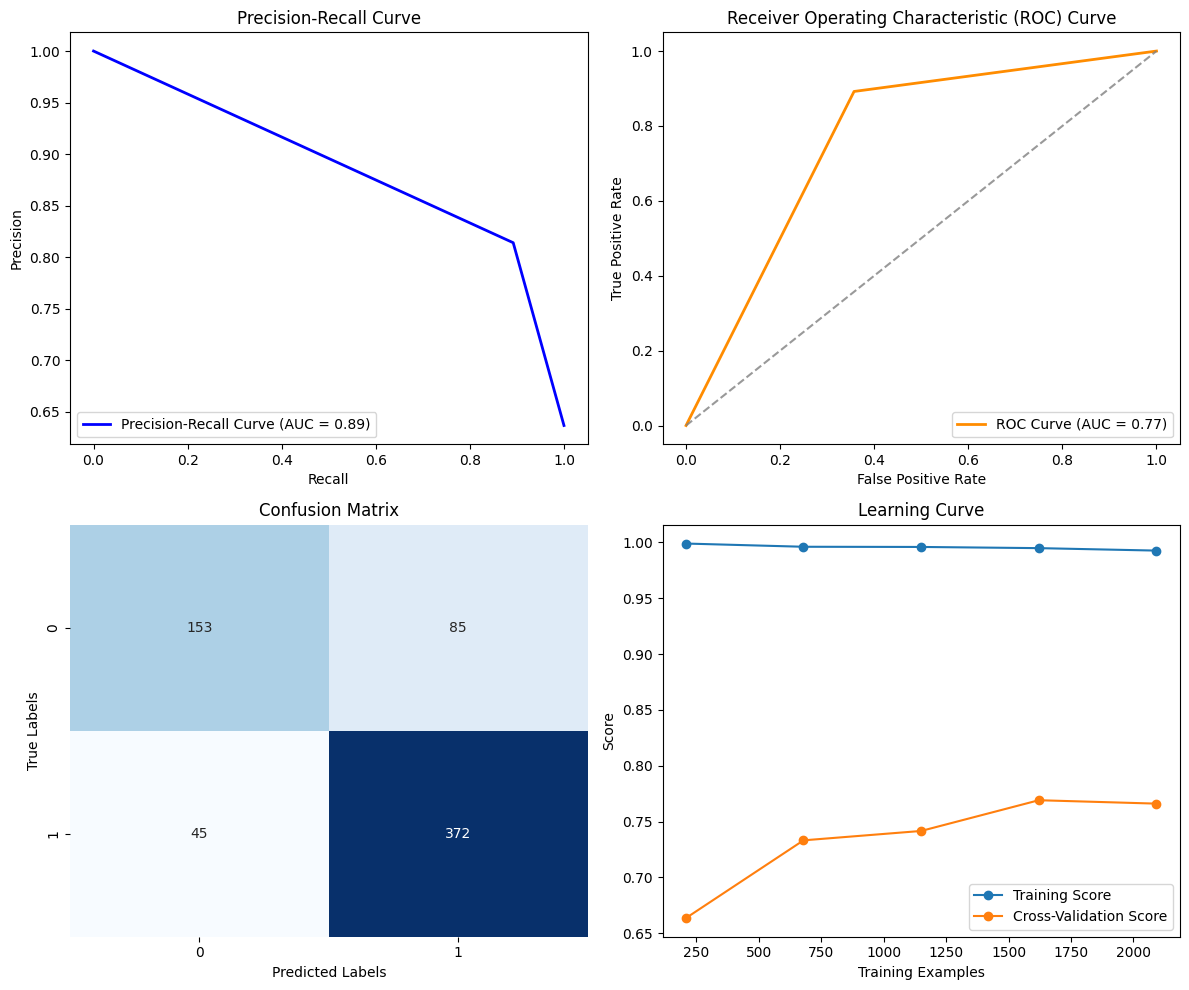

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier




# Make predictions on the test set
y_pred = best_voting_classifier2.predict(X_test)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# No changes to the rest of the code, just use y_pred instead of y_score

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
axes[0, 0].plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve')
axes[0, 0].legend(loc='lower left')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.8)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0, 1].legend(loc='lower right')

# Plot Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted Labels')
axes[1, 0].set_ylabel('True Labels')
axes[1, 0].set_title('Confusion Matrix')

# Plot Learning Curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    voting_classifier2, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(.1, 1.0, 5), return_times=True
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

axes[1, 1].plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
axes[1, 1].plot(train_sizes, test_scores_mean, 'o-', label='Cross-Validation Score')
axes[1, 1].set_xlabel('Training Examples')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()


In [62]:
import joblib
from sklearn.ensemble import VotingClassifier



# Save the model using joblib
joblib.dump(best_voting_classifier2, 'best_voting_classifier_model.pkl')

['best_voting_classifier_model.pkl']

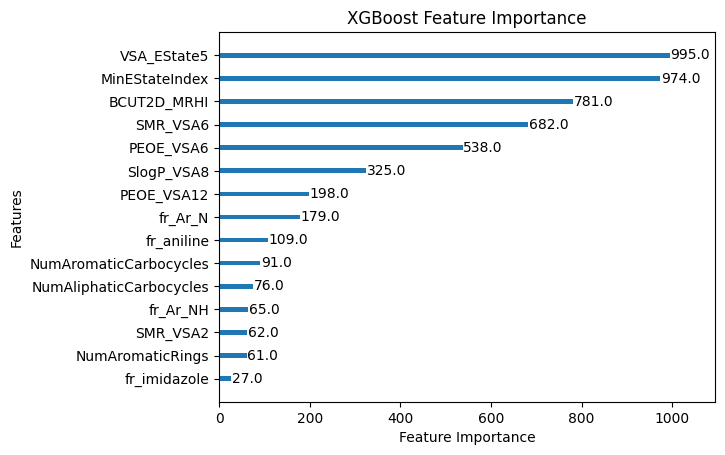

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have an XGBoost model named 'xgb_model'
# Fit your model before getting feature importance

# Plot feature importance
xgb.plot_importance(best_xgb_model, importance_type='weight', xlabel='Feature Importance', ylabel='Features', title='XGBoost Feature Importance', grid=False)
plt.show()
